In [107]:
# importing the necessary libraries for training a model using Logistic Regression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score


In [108]:
df=pd.read_csv('../data/Diabetes_Cleaned.csv')


In [109]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0


In [110]:
# lets separate the features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [111]:
# After separating the features and target variable, we will split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Now Scaling the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [113]:
# Now lets make an instance of the Logistic Regression model ans use class_weight='balanced' to handle class imbalance

model = LogisticRegression(class_weight='balanced', max_iter=1000)


In [114]:
# now lets fit the model on the training data
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [115]:
# Predicting the target variable on the test set
y_pred = model.predict(X_test)

In [116]:
# After predicting the outcomes, we will evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
# Now lets print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')



Accuracy: 0.6796875
Confusion Matrix:
[[66 26]
 [15 21]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76        92
         1.0       0.45      0.58      0.51        36

    accuracy                           0.68       128
   macro avg       0.63      0.65      0.63       128
weighted avg       0.71      0.68      0.69       128



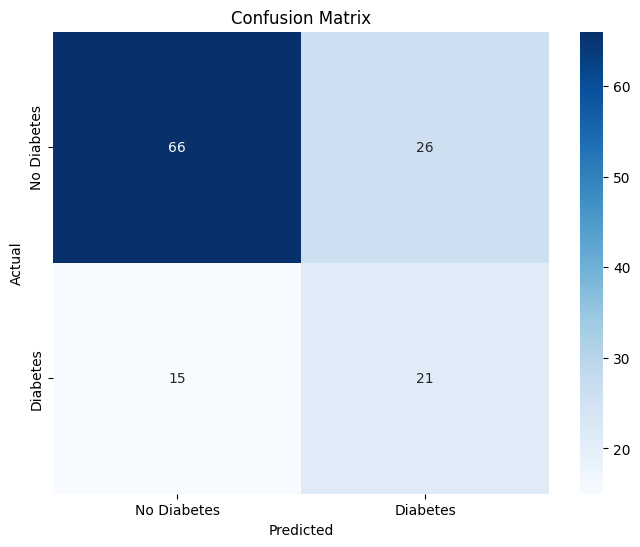

In [117]:
# Lets visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [118]:
# Lets predict the new data
new_data = [[5, 116, 74, 0, 0, 25.6, 0.201, 30]]  # Example data point
new_data_scaled = scaler.transform(new_data)  # Scale the new data
new_prediction = model.predict(new_data_scaled)
# Print the prediction for the new data
print(f'Prediction for new data: {new_prediction[0]}')  # 0
print(f'You have {"Diabetes" if new_prediction[0] == 1 else "No Diabetes"}')


Prediction for new data: 0.0
You have No Diabetes


d:\ML(ExtraClass Project)\DiabetoScan-Predicting-Diabetes-with-Logistic-Regression\.diabetoscanenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [119]:
new_data_test=[[6,148,72,35,0,33.6,0.627,50]]
new_data_scaled_test = scaler.transform(new_data_test)  # Scale the new data
new_prediction_test = model.predict(new_data_scaled_test)
# Print the prediction for the new data
print(f'Prediction for new data test: {new_prediction_test[0]}')  # 1
print(f'You have {"Diabetes" if new_prediction_test[0] == 1 else "No Diabetes"}')

Prediction for new data test: 1.0
You have Diabetes


d:\ML(ExtraClass Project)\DiabetoScan-Predicting-Diabetes-with-Logistic-Regression\.diabetoscanenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [120]:
# lets check again in another new data
another_new_data = [[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0]]
another_new_data_scaled = scaler.transform(another_new_data)
another_new_prediction = model.predict(another_new_data_scaled)
print(f'Prediction for another new data: {another_new_prediction[0]}')
print(f'You have {"Diabetes" if another_new_prediction[0] == 1 else "No Diabetes"}')

Prediction for another new data: 0.0
You have No Diabetes


d:\ML(ExtraClass Project)\DiabetoScan-Predicting-Diabetes-with-Logistic-Regression\.diabetoscanenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [121]:
# Now lets save the model and the scaler using joblib
import joblib
# Save the model
joblib.dump(model, '../notebook/diabetes_model.pkl')
# Save the scaler
joblib.dump(scaler, '../notebook/scaler.pkl')

['../notebook/scaler.pkl']